In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# set the time span which we will use
start = datetime.datetime(1954, 1, 1)
end = datetime.date.today()

# Import the data
intRate = web.DataReader(["USREC", "FEDFUNDS", "GDPPOT", "GDPC1", "GDPDEF"], "fred", start, end)


In [2]:
# Change data to all be quarterly
intRate = intRate.resample('Q').mean()


In [3]:
# Calculate percent changes in inflation and GDP
intRate['infl'] = intRate['GDPDEF'].pct_change(freq = 'Q')*100
intRate['GDPpct'] = intRate['GDPC1'].pct_change(freq = 'Q')*100
# Create variable for the deviation of real GDP from Potential GDP
intRate['dev'] = ((intRate['GDPC1'] - intRate['GDPPOT']) / intRate['GDPPOT'])*100

# Calculate the "Taylor rule" rate
# r = IPD + 2 + 0.5*(IPD - 2) + 0.5*(GDP - GDPPOT)/GDPPOT*100
# Figure out what is wrong here, because the values for r seem incorrect
intRate['tr'] = (intRate['infl'] + 2) + (0.5*(intRate['infl'] - 2)) + (0.5*intRate['dev'])

In [4]:
intRate.describe()

,USREC,FEDFUNDS,GDPPOT,GDPC1,GDPDEF,infl,GDPpct,dev,tr
count,263.000000,261.000000,264.000000,262.000000,262.000000,263.000000,263.000000,262.000000,261.000000
mean,0.134347,4.785096,9458.021591,9283.066111,55.719645,0.781473,0.756002,-0.713688,1.826183
std,0.325139,3.576302,5051.644400,4906.744696,31.810504,0.573451,0.865584,2.331142,1.499632
min,0.000000,0.073333,2694.800000,2649.755000,14.543000,-0.145300,-2.595847,-7.446502,-2.169369
25%,0.000000,2.133333,5030.800000,4949.992250,21.635250,0.404466,0.324019,-2.177196,0.827935
50%,0.000000,4.496667,8489.000000,8285.830000,55.910000,0.602797,0.754020,-0.886354,1.716642
75%,0.000000,6.513333,14159.375000,13615.447750,81.932250,1.001474,1.189272,0.803809,2.597355
max,1.000000,17.780000,19064.100000,19021.860000,112.188000,2.942027,3.864251,5.820738,5.496186


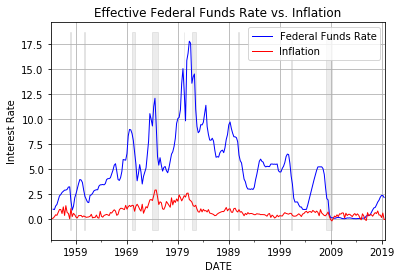

In [5]:
gdfed = intRate.plot(y = ['FEDFUNDS', 'infl'], title = "Effective Federal Funds Rate vs. Inflation",
                    grid = True, lw = 1, color = ['blue', 'red'])
# Label the y-axis
gdfed.set_ylabel('Interest Rate')
# Rename the plotted lines to something a little more meaningful
gdfed.legend(['Federal Funds Rate', 'Inflation'])
# Shade in recessions
gdfed.fill_between(intRate.index, gdfed.get_ylim()[0], gdfed.get_ylim()[1], where = (intRate['USREC']==1),
                color = 'gray', alpha = 0.15)
plt.show()

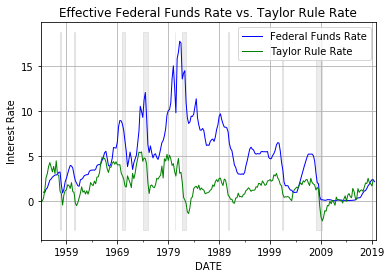

In [6]:
# Set up the graph
fed = intRate.plot(y = ['FEDFUNDS', 'tr'], title = "Effective Federal Funds Rate vs. Taylor Rule Rate",
                    grid = True, lw = 1, color = ['blue', 'green' ])
# Label the y-axis
fed.set_ylabel('Interest Rate')
# Rename the plotted lines to something a little more meaningful
fed.legend(['Federal Funds Rate', 'Taylor Rule Rate'])
# Shade in recessions
fed.fill_between(intRate.index, fed.get_ylim()[0], fed.get_ylim()[1], where = (intRate['USREC']==1),
                color = 'gray', alpha = 0.15)
plt.show()
# Something is wrong with the Taylor Rule rates.

In [7]:
hap = pd.read_excel("Chapter2OnlineData.xlsx", sheet_name = "Figure2.6", header=0)
hap.sort_values(by=['Country'], inplace = True)
hap = hap.reset_index(drop=True)

In [8]:
hapg = pd.read_excel("Chapter2OnlineData.xlsx", sheet_name = "Table2.1", header=0)
hapg = hapg[hapg['Year'] == 2018]
hapg = hapg.reset_index(drop = True)
hap.head(10)

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Afghanistan,3.2033,3.277512,3.129088,1.793060,0.349631,0.517003,0.360616,0.000000,0.158151,0.024875
1,Albania,4.7186,4.829273,4.607927,1.461002,0.947101,0.847681,0.874208,0.383339,0.178159,0.027084
2,Algeria,5.2113,5.303558,5.119041,1.992307,1.001515,1.159618,0.785282,0.085533,0.072642,0.114428
3,Argentina,6.0863,6.191539,5.981061,2.096293,1.091516,1.431508,0.880779,0.470637,0.065920,0.049697
4,Armenia,4.5594,4.651613,4.467187,1.397996,0.850109,1.054940,0.814928,0.282625,0.095033,0.063795
5,Australia,7.2280,7.314588,7.141413,2.094287,1.371545,1.547957,1.035532,0.557172,0.331549,0.289962
6,Austria,7.2460,7.312841,7.179158,2.377548,1.375542,1.475222,1.015777,0.532075,0.243567,0.226221
7,Azerbaijan,5.2077,5.278987,5.136412,1.679619,1.042803,1.147335,0.768873,0.351472,0.035472,0.182139
8,Bahrain,6.1994,6.323913,6.074887,1.698076,1.361811,1.367559,0.871097,0.535697,0.254980,0.110144
9,Bangladesh,4.4558,4.538151,4.373449,1.406030,0.562270,0.928245,0.722729,0.527392,0.165773,0.143402


In [9]:
hapg.head(10)

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2018,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,...,NaN,NaN,0.290681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,2018,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,...,NaN,0.303250,0.456174,NaN,NaN,NaN,0.243243,0.232000,NaN,NaN
2,Algeria,2018,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,...,NaN,0.276000,0.667872,NaN,NaN,NaN,NaN,0.107644,NaN,0.179286
3,Argentina,2018,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,...,NaN,0.460938,0.405356,NaN,0.270073,0.223553,0.170844,0.150154,0.174058,0.193531
4,Armenia,2018,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,...,NaN,0.319250,0.406403,NaN,NaN,NaN,0.235000,NaN,NaN,0.109136
5,Australia,2018,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,...,NaN,0.342750,0.429814,NaN,0.478149,NaN,0.394492,NaN,0.461379,0.518140
6,Austria,2018,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.752350,...,NaN,0.302692,0.299504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Azerbaijan,2018,5.167995,9.678014,0.781230,65.500000,0.772449,-0.251795,0.561206,0.592575,...,NaN,0.211000,0.260410,NaN,NaN,NaN,0.194306,NaN,NaN,0.147933
8,Bangladesh,2018,4.499217,8.220746,0.705556,64.300003,0.901471,-0.038008,0.701421,0.541345,...,NaN,0.327750,0.367609,NaN,NaN,NaN,0.204590,0.232667,NaN,NaN
9,Belarus,2018,5.233770,9.778739,0.904569,66.099998,0.643602,-0.181865,0.718455,0.450333,...,NaN,0.281294,0.293444,NaN,NaN,0.250246,0.229924,NaN,NaN,0.329065


In [10]:
hapg = hapg.merge(hap, how='outer', left_on='Country name', right_on='Country')
hapg = hapg.dropna(how='any', subset=['Log GDP per capita', 'Happiness score'])

In [11]:
hapg.head(10)

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Afghanistan,2018.0,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,...,3.2033,3.277512,3.129088,1.793060,0.349631,0.517003,0.360616,0.000000,0.158151,0.024875
1,Albania,2018.0,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,...,4.7186,4.829273,4.607927,1.461002,0.947101,0.847681,0.874208,0.383339,0.178159,0.027084
2,Algeria,2018.0,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,...,5.2113,5.303558,5.119041,1.992307,1.001515,1.159618,0.785282,0.085533,0.072642,0.114428
3,Argentina,2018.0,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,...,6.0863,6.191539,5.981061,2.096293,1.091516,1.431508,0.880779,0.470637,0.065920,0.049697
4,Armenia,2018.0,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,...,4.5594,4.651613,4.467187,1.397996,0.850109,1.054940,0.814928,0.282625,0.095033,0.063795
5,Australia,2018.0,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,...,7.2280,7.314588,7.141413,2.094287,1.371545,1.547957,1.035532,0.557172,0.331549,0.289962
6,Austria,2018.0,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.752350,...,7.2460,7.312841,7.179158,2.377548,1.375542,1.475222,1.015777,0.532075,0.243567,0.226221
7,Azerbaijan,2018.0,5.167995,9.678014,0.781230,65.500000,0.772449,-0.251795,0.561206,0.592575,...,5.2077,5.278987,5.136412,1.679619,1.042803,1.147335,0.768873,0.351472,0.035472,0.182139
8,Bangladesh,2018.0,4.499217,8.220746,0.705556,64.300003,0.901471,-0.038008,0.701421,0.541345,...,4.4558,4.538151,4.373449,1.406030,0.562270,0.928245,0.722729,0.527392,0.165773,0.143402
9,Belarus,2018.0,5.233770,9.778739,0.904569,66.099998,0.643602,-0.181865,0.718455,0.450333,...,5.3225,5.392422,5.252578,1.530803,1.067027,1.465442,0.788669,0.234866,0.094133,0.141593


Text(0.5, 0, 'Log GDP per Capita')

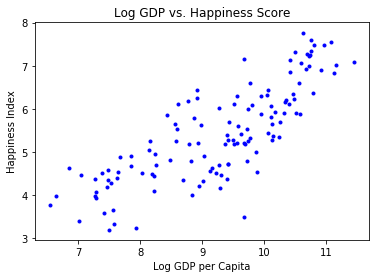

In [12]:
plt.scatter(hapg['Log GDP per capita'], hapg['Happiness score'], marker = '.', c = 'blue')
plt.title('Log GDP vs. Happiness Score')
plt.ylabel('Happiness Index')
plt.xlabel('Log GDP per Capita')

Text(0.5, 0, 'Log GDP per Capita')

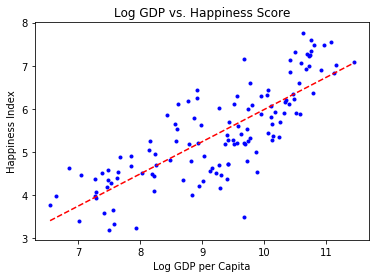

In [13]:
plt.scatter(hapg['Log GDP per capita'], hapg['Happiness score'], marker='.', c='blue')
plt.plot(np.unique(hapg['Log GDP per capita']), np.poly1d(np.polyfit(hapg['Log GDP per capita'], hapg['Happiness score'] , 1))
         (np.unique(hapg['Log GDP per capita'])), color='red', linestyle='--', linewidth=1.5)
plt.title('Log GDP vs. Happiness Score')
plt.ylabel('Happiness Index')
plt.xlabel('Log GDP per Capita')